In [1]:
import pandas as pd
import numpy as np

#import clean data
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
%%capture
! pip install ipywidgets

In [9]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact,interactive,fixed,interact_manual

C:\Users\Karthik\Anaconda3\envs\mlcc\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
# checking above cell

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\Karthik\Anaconda3\envs\mlcc\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width,height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = "b", label = BlueName, ax = ax1)
    
    plt.title(Title)
    plt.xlabel('Price(in dollars)')
    plt.ylabel('Proportion of cars')
    
    plt.show()
    plt.close()

In [73]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    
    #training data
    #testing data
    # lr : linear regression object
    # poly_transform : polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arrange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, ytrain, 'ro', label = 'Training data')
    plt.plot(xtest, ytest, 'go', label ='Test data')
    plt.plot(x, lr_predict(poly_transform.fit_transform(x.reshape(-1,1))), label = 'Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

In [74]:
#  Training and testing

In [75]:
# we place the target data in different data set

y_data = df['price']

In [76]:
x_data = df.drop('price',axis=1)

In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 1)

print("Number of test samples: ", x_test.shape[0])

print("Number of training samples: ", x_train.shape[0])

Number of test samples:  31
Number of training samples:  170


In [78]:
#checking same from class


from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [79]:
#Question: Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for 
#       testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1"
#       , "x_test_1", "y_train_1" and "y_test_1".

xtrain_1,xtest_1,ytrain_1,ytest_1 = train_test_split(x_data,y_data,test_size = 0.4, random_state = 0)

print("number of test samples: ", xtest_1.shape[0])
print("number of training samples: ", xtrain_1.shape[0])

number of test samples:  81
number of training samples:  120


In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lr.score(x_test[['horsepower']], y_test)

0.707688374146705

In [84]:
lr.score(x_train[['horsepower']], y_train)

0.6449517437659684

In [85]:
# Question : Find the R^2 on the test data using 90% of the data for training data 

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.1, random_state = 0)
lr.score(x_train1[['horsepower']], y_train1)


0.6471017111080093

In [86]:
lr.score(x_test1[['horsepower']],y_test1)

0.7408904462202237

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)
rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [89]:
print("The mean of folds are : ", rcross.mean(), " and the standard deviation is :", rcross.std())

The mean of folds are :  0.522009915042119  and the standard deviation is : 0.2911839444756029


In [90]:
-1 * cross_val_score(lr, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

In [91]:
# Question : Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature : 

r2 = cross_val_score(lr, x_data[['horsepower']], y_data, cv= 2)

In [92]:
r2

array([0.59015621, 0.44319613])

In [93]:
r2[1]

0.443196127755029

In [94]:
from sklearn.model_selection import cross_val_predict

In [95]:
yhat = cross_val_predict(lr, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [96]:
lrm = LinearRegression()
lrm.fit(x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
yhat_train = lrm.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [98]:
yhat_test = lrm.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

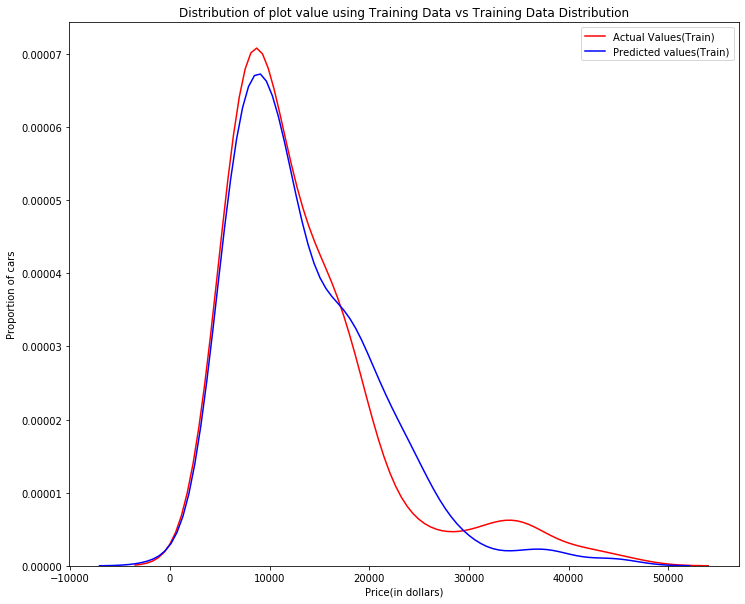

In [100]:
Title = 'Distribution of plot value using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values(Train)", "Predicted values(Train)",Title)

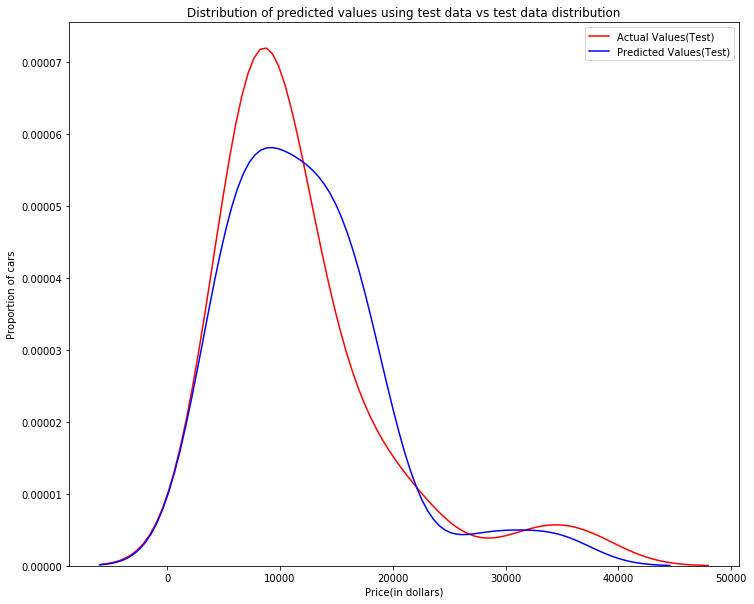

In [101]:
Title = 'Distribution of predicted values using test data vs test data distribution'
DistributionPlot(y_test,yhat_test,"Actual Values(Test)","Predicted Values(Test)",Title)

In [102]:
from sklearn.preprocessing import PolynomialFeatures

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.45, random_state = 0)

In [104]:
pr = PolynomialFeatures(degree= 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_train[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [105]:
poly = LinearRegression()

In [106]:
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([13157.92417864, 21890.74144852,  6409.57772745, 21231.67546243,
        7905.32486018])

In [108]:
print("Predicted values: ", yhat[0:4])
print("True values: ", y_test[0:4].values)

Predicted values:  [13157.92417864 21890.74144852  6409.57772745 21231.67546243]
True values:  [ 6295. 10698. 13860. 13499.]


In [111]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

AttributeError: module 'numpy' has no attribute 'arrange'

<Figure size 864x720 with 0 Axes>

In [114]:
pr1 = PolynomialFeatures(degree = 2)

In [115]:
x_train_pr1 = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [116]:
x_train_pr1.shape

(110, 126)

In [118]:
poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)

NameError: name 'linear_model' is not defined

In [119]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [120]:
from sklearn.linear_model import Ridge

In [121]:
RidgeModel = Ridge(alpha =0.1)

In [122]:
RidgeModel.fit(x_train_pr,y_train)

C:\Users\Karthik\Anaconda3\envs\mlcc\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [123]:
yhat = RidgeModel.predict(x_test_pr)

In [124]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [128]:
Rsqu_train = []
Rsqu_test = []
dummy1 = []
ALFA = 10*np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge (alpha = alfa)
    RigeModel.fit(x_train_pr,y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr,y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

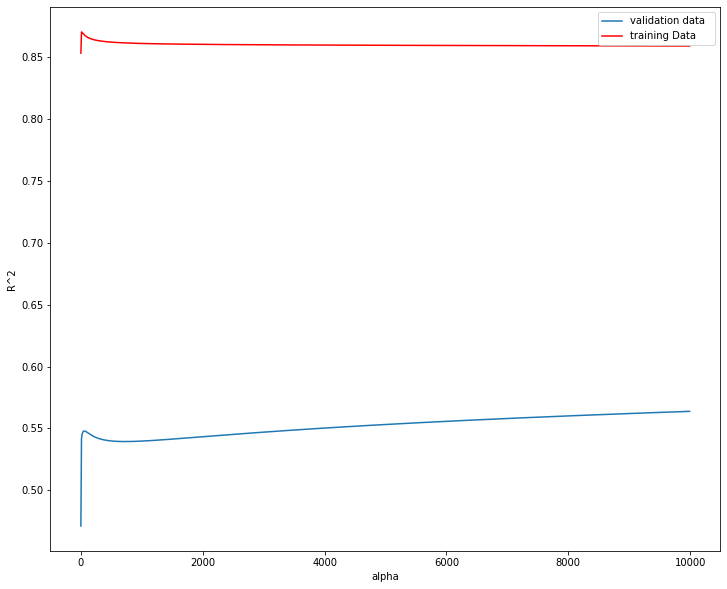

In [129]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()